In [1]:
import numpy as np
import pandas as pd

from kagglex_cohort4 import *

In [3]:
url = "train.csv"
raw = pd.read_csv(url, engine="pyarrow", dtype_backend="pyarrow")
cars = clean_housing(raw)

In [7]:
target = "price"
features = [col for col in cars.columns if col not in target]

X = cars[features].select_dtypes("number")
y = cars[target]

In [9]:
X

,id,model_year,milage
0,0,2018,74349
1,1,2007,80000
2,2,2009,91491
3,3,2022,2437
4,4,2001,111000
...,...,...,...
54268,54268,2017,29000
54269,54269,2015,94634
54270,54270,2013,40989
54271,54271,2023,1518


In [10]:
y

0         11000
1          8250
2         15000
3         63500
4          7850
          ...  
54268     29000
54269      6500
54270     18950
54271    194965
54272     37499
Name: price, Length: 54273, dtype: uint32[pyarrow]

In [11]:
from sklearn import linear_model, model_selection, preprocessing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=43)

In [12]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.10449021541446346

In [13]:
lr.coef_

array([-1.41209400e-02,  1.25134689e+03, -2.66419639e-01])

In [14]:
lr.feature_names_in_

array(['id', 'model_year', 'milage'], dtype=object)

In [15]:
pd.Series(lr.coef_, index=lr.feature_names_in_)

id              -0.014121
model_year    1251.346888
milage          -0.266420
dtype: float64

<Axes: >

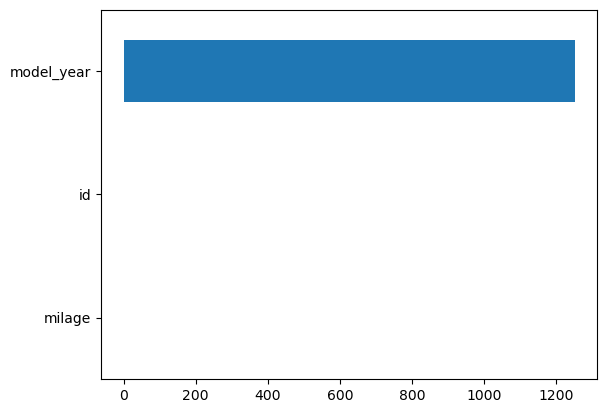

In [16]:
(
    pd.Series(lr.coef_, index=lr.feature_names_in_)
    .sort_values()
    .plot.barh()
)

<Axes: >

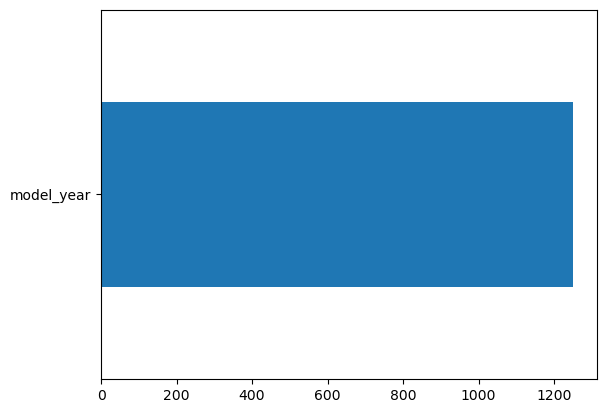

In [17]:
(
    pd.Series(lr.coef_, index=lr.feature_names_in_)
    .pipe(lambda ser: ser[ser.abs() > 100])
    .sort_values()
    .plot.barh()
)

In [18]:
std = preprocessing.StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [19]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.10449021541445969

<Axes: >

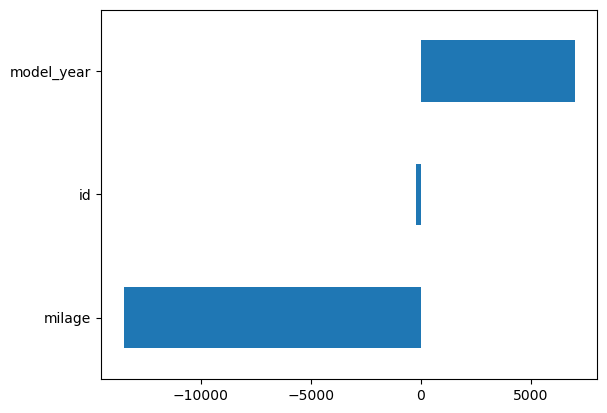

In [20]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .plot.barh())

In [21]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
# .plot.barh()
)

milage       -13492.259478
id             -221.270475
model_year     6983.351147
dtype: float64

<Axes: >

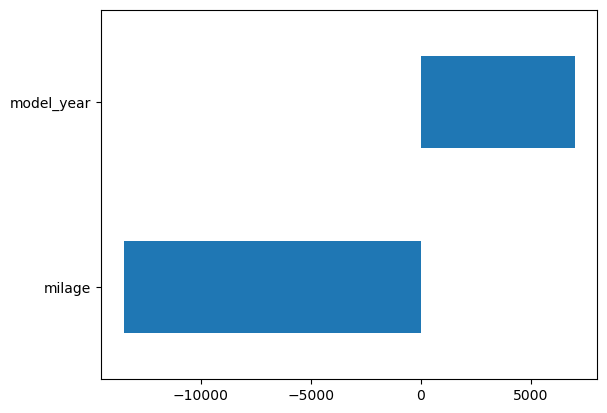

In [23]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 5000])
 .plot.barh()
)

In [24]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 # .pipe(lambda ser: ser[ser.abs() > 1e8])
 .index
)

Index(['milage', 'id', 'model_year'], dtype='object')

In [25]:
# Look at correlations 
(X
 .assign(price=y)
 .corr()
 .loc[['milage', 'id', 'model_year']]
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
 .set_sticky(axis='index') 
)

,id,model_year,milage,price
milage,-0.003194,-0.625226,1.000000,-0.248927
id,1.000000,0.000741,-0.003194,0.000587
model_year,0.000741,1.000000,-0.625226,0.216150


In [34]:
X = cars[features].select_dtypes("number")
y = cars[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=43)
std = preprocessing.StandardScaler().set_output(transform="pandas")
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [27]:
import xgboost as xgb

In [31]:
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.07180439228591795

<Axes: >

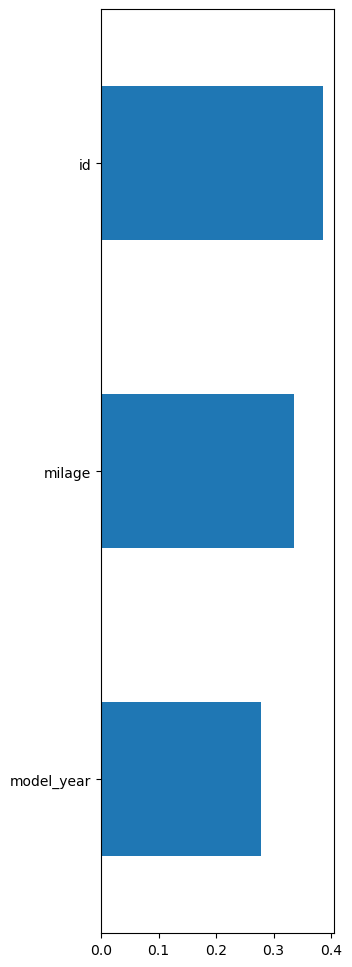

In [32]:
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().plot.barh(figsize=(3,12))

In [35]:
X_cat = (cars.assign(**cars.select_dtypes('number').astype('Int64')).drop(columns='price'))

y_cat = cars.price
X_cat_train, X_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(X_cat, y_cat, random_state=43)
xg_cat = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')
xg_cat.fit(X_cat_train, y_cat_train)
xg_cat.score(X_cat_test, y_cat_test)

-0.014101503613416222

<Axes: >

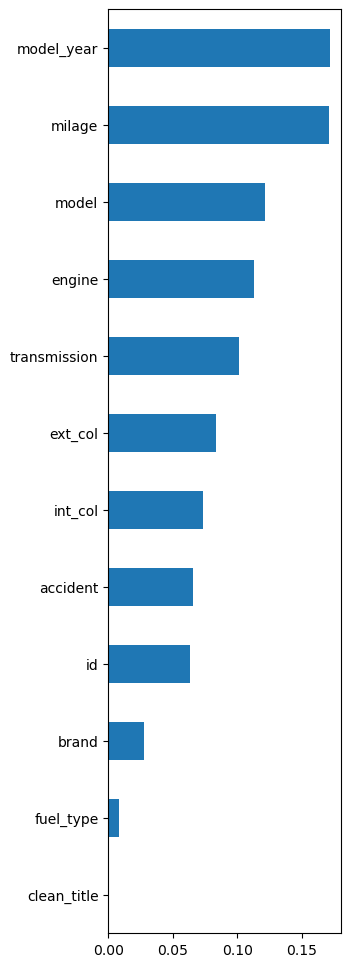

In [36]:
pd.Series(xg_cat.feature_importances_, index=xg_cat.feature_names_in_).sort_values().plot.barh(figsize=(3,12))